In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

### 1. Creation of qubit grid

In [2]:
G = nx.grid_graph(dim=[2,3])

In [3]:
G.nodes

NodeView(((0, 0), (0, 1), (1, 0), (1, 1), (2, 0), (2, 1)))

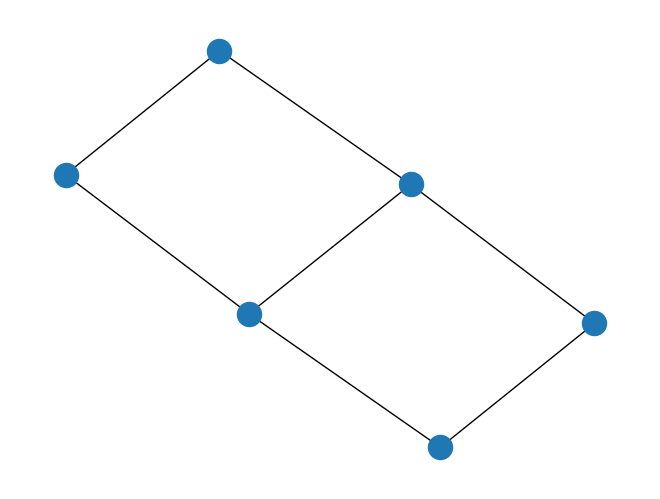

In [4]:
nx.draw(G)

In [5]:
print(G.edges)

[((0, 0), (1, 0)), ((0, 0), (0, 1)), ((0, 1), (1, 1)), ((1, 0), (2, 0)), ((1, 0), (1, 1)), ((1, 1), (2, 1)), ((2, 0), (2, 1))]


### 2. Test state contraction with CZ gate

In [6]:
# Initial + state
N = 3
psi = 0.5 ** (N/2) * np.ones([2 for _ in range(N)])

In [7]:
CZ = np.array([[1, 0, 0, 0],
                [0, 1, 0, 0],
                [0, 0, 1, 0],
                [0, 0, 0, -1]])
CZ_tens = CZ.reshape((2, 2, 2, 2))

In [8]:
psi_res = np.einsum('ijk,iabj->abk', psi, CZ_tens)
psi_res.reshape((2 ** N))

array([ 0.35355339,  0.35355339,  0.35355339,  0.35355339,  0.35355339,
        0.35355339, -0.35355339, -0.35355339])

In [9]:
np.tensordot(psi, CZ_tens, axes=([0, 1], [0, 1])).reshape((2 ** N))

array([ 0.35355339,  0.35355339,  0.35355339, -0.35355339,  0.35355339,
        0.35355339,  0.35355339, -0.35355339])

In [10]:
psi_res = np.tensordot(psi, CZ_tens, axes = ((0, 1),(0, 1)))
psi_res.reshape((2 ** N))

array([ 0.35355339,  0.35355339,  0.35355339, -0.35355339,  0.35355339,
        0.35355339,  0.35355339, -0.35355339])

### 3. Combine steps 1 and 2

In [11]:
N = 3

graph = nx.grid_graph(dim=[N])

mapping = {node: i for i, node in enumerate(list(graph.nodes))}
graph = nx.relabel_nodes(graph, mapping)

psi = 0.5 ** (N/2) * np.ones([2 for _ in range(N)])

CZ = np.array([[1, 0, 0, 0],
                [0, 1, 0, 0],
                [0, 0, 1, 0],
                [0, 0, 0, -1]])
CZ_tens = CZ.reshape((2, 2, 2, 2))

In [12]:
CZ_tens

array([[[[ 1,  0],
         [ 0,  0]],

        [[ 0,  1],
         [ 0,  0]]],


       [[[ 0,  0],
         [ 1,  0]],

        [[ 0,  0],
         [ 0, -1]]]])

In [13]:
for pair in graph.edges:
    psi = np.moveaxis(np.tensordot(psi, CZ_tens, axes = (pair, (0, 1))), (-2, -1), pair)

In [14]:
psi.reshape((2 ** N))

array([ 0.35355339,  0.35355339,  0.35355339, -0.35355339,  0.35355339,
        0.35355339, -0.35355339,  0.35355339])

### 4. Measurements

In [15]:
N = 3

graph = nx.grid_graph(dim=[N])

mapping = {node: i for i, node in enumerate(list(graph.nodes))}
graph = nx.relabel_nodes(graph, mapping)

psi = 0.5 ** (N/2) * np.ones([2 for _ in range(N)])

In [16]:
for pair in graph.edges:
    psi = np.moveaxis(np.tensordot(psi, CZ_tens, axes = (pair, (0, 1))), (-2, -1), pair)

In [17]:
psi.reshape(2 ** N)

array([ 0.35355339,  0.35355339,  0.35355339, -0.35355339,  0.35355339,
        0.35355339, -0.35355339,  0.35355339])

In [18]:
X = np.array([[0, 1],
             [1, 0]])
Y = np.array([[0, -1j],
             [1j, 0]])
Z = np.array([[1, 0],
             [0, -1]])

Z_basis = np.array([[1, 0],[0, 1]])
X_basis = 0.5 ** (1/2) * np.array([[1, 1],[1, -1]])
Y_basis = 0.5 ** (1/2) * np.array([[1, 1j],[1, -1j]])

In [19]:
k = 0
# Z
psi_meas = np.tensordot(psi, X_basis[1], axes = (k, 0))

In [20]:
np.linalg.norm(psi_meas) ** 2

0.5000000000000002

In [21]:
psi_meas.reshape(2 ** (N-1))

array([ 0. ,  0. ,  0.5, -0.5])

### test

In [22]:
import sys
sys.path.append('rusmbqc/')
from scheme import Scheme
from frame import Frame
from measurements import X, Y, Z, X_Y

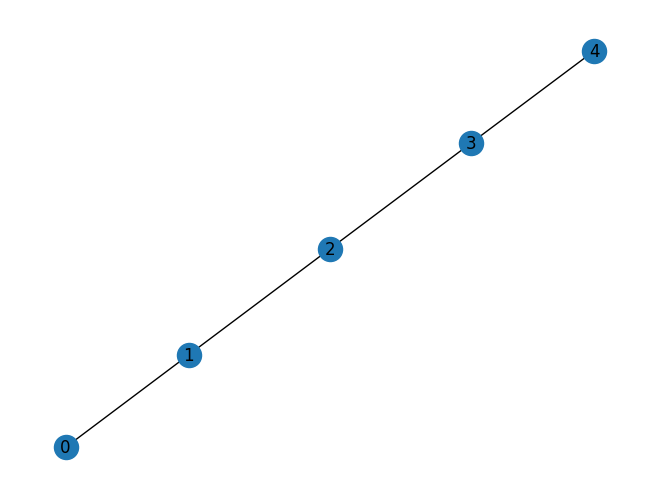

In [36]:
N = 5
G = nx.grid_graph(dim=[N])
nx.draw(G, with_labels = True)

In [30]:
sch = Scheme(G)

In [31]:
frame1 = Frame()
frame1.append(0, X())
frame1.append(1, X())
frame1.append(2, Y())
frame1.append(3, X())

In [32]:
sch.perform_frame(frame1)

Measurement X on node 0 : 1
Measurement X on node 1 : 1
Measurement Y on node 2 : 1
Measurement X on node 3 : 1


In [33]:
sch.left_psi()

array([0.70710678+0.j        , 0.        +0.70710678j])